# 🏰 Análisis de Data Products del Ministerio de Magia (2024)

**Autor:** Sergio Nicolás Seguí

**Asignatura:** Programación y Entornos de Trabajo para la IA

## 1. Introducción
Bienvenido a este informe oficial del Ministerio. En este pergamino digital (Notebook), vamos a analizar el estado de los "Data Products" de Hogwarts.

Nuestro objetivo es dar visibilidad a los Altos Cargos sobre:
1. Qué departamentos (Dominios) tienen más herramientas mágicas.
2. Si estamos cumpliendo las leyes mágicas (`Compliance`).
3. Cómo evolucionan las herramientas (si están en uso, deprecadas o en desarrollo).

Para ello, usaremos hechizos de Python (`pandas`) para unir los reportes de los tres trimestres del año 2024.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética de los gráficos para que se vean bien en el Ministerio
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

def load_and_label_quarter(file_path: str, quarter_label: str) -> pd.DataFrame:
  """Carga un archivo CSV y le añade una etiqueta temporal.

  Esta función actúa como un hechizo de invocación ('Accio CSV') que trae
  los datos y les pone una marca de tiempo para no confundirnos luego.

  Args:
    file_path: La ruta o nombre del archivo CSV (el pergamino).
    quarter_label: El nombre del trimestre (ej: '1T').

  Returns:
    Un DataFrame de pandas con los datos del trimestre y su etiqueta.
  """
  try:
    df = pd.read_csv(file_path)
    df['Quarter'] = quarter_label  # Añadimos la marca del trimestre
    return df
  except FileNotFoundError:
    print(f"⚠️ Error: No se encuentra el pergamino {file_path}. ¿Está en la carpeta correcta?")
    return pd.DataFrame()

## 2. Reunión de los Pergaminos Trimestrales

El Ministerio nos ha enviado tres archivos separados (`csv`), uno por cada trimestre. Analizarlos por separado sería como intentar leer tres libros a la vez.

**La Estrategia:**
1. Invocamos cada archivo por separado.
2. Los etiquetamos (1T, 2T, 3T).
3. Los fusionamos en un solo "Gran Libro de Registros" (DataFrame anual) para tener la visión completa del año.

In [3]:
# Nombres de los archivos (asegúrate de que están en la misma carpeta que este notebook)
file_1t = 'Hogwards - 20241T.csv'
file_2t = 'Hogwards - 20242T.csv'
file_3t = 'Hogwards - 20243T.csv'

# Cargamos los datos usando nuestra función auxiliar
df_1t = load_and_label_quarter(file_1t, '1T')
df_2t = load_and_label_quarter(file_2t, '2T')
df_3t = load_and_label_quarter(file_3t, '3T')

# Unimos los tres trimestres en un solo DataFrame (Concatenación)
# Es como coser los tres pergaminos en uno solo largo.
hogwarts_df = pd.concat([df_1t, df_2t, df_3t], ignore_index=True)

# Mostramos las primeras líneas para verificar que la magia funcionó
print("Vista previa del Gran Libro de Registros (Primeras 5 líneas):")
display(hogwarts_df.head())

# Verificación rápida de la estructura
print(f"\nDimensiones totales: {hogwarts_df.shape[0]} registros y {hogwarts_df.shape[1]} columnas.")

Vista previa del Gran Libro de Registros (Primeras 5 líneas):


,ID,Name,Descriptive Name,Description,Domain,Owner,IsCompliance,Status,Version,NumberUsers,Quarter
0,DP001,ProfeciaMonitor,Monitor de Pociones,"Data Product relacionado con adivinacion, util...",Adivinacion,Sybill Trelawney,True,Production,1.4.0,46,1T
1,DP002,CriaturaWatch,Sistema de Seguimiento de Hechizos,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,True,Production,2.6.9,100,1T
2,DP003,EstelarMap,Aplicacion de Transfiguraciones,"Data Product relacionado con pociones, utiliza...",Pociones,Severus Snape,False,Deprecated,0.4.1,38,1T
3,DP004,Transfigurator,Monitor de Pociones,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,False,Development,2.9.6,99,1T
4,DP005,CriaturaWatch,Vigilante de Criaturas Magicas,"Data Product relacionado con transformaciones,...",Transformaciones,Minerva McGonagall,True,Production,2.3.7,51,1T



Dimensiones totales: 207 registros y 11 columnas.


## 3. Limpieza de Duendes y Errores (Data Cleaning)

A veces, los duendes de las mazmorras introducen datos erróneos o huecos en nuestros registros. Antes de analizar, debemos aplicar un hechizo de limpieza (`Scourgify`) para asegurarnos de que no hay valores nulos (`NaN`) o tipos de datos extraños que puedan arruinar nuestros cálculos.

In [4]:
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
  """Realiza una limpieza básica de los datos.

  Busca valores vacíos y asegura que los tipos de datos sean correctos
  para evitar errores en los cálculos futuros.

  Args:
    df: El DataFrame original sucio.

  Returns:
    El DataFrame limpio y listo para el análisis.
  """
  # Hacemos una copia para no alterar el original inadvertidamente
  df_clean = df.copy()

  # Verificamos nulos
  null_counts = df_clean.isnull().sum()
  if null_counts.sum() > 0:
      print(f"⚠️ Se detectaron valores nulos:\n{null_counts[null_counts > 0]}")
      # Aquí decidiríamos cómo tratarlos (borrar o rellenar).
      # Por ahora, si son pocos, los mantenemos vigilados o los borramos.
      df_clean = df_clean.dropna()
  else:
      print("✨ ¡Los datos están inmaculados! No se encontraron valores nulos.")

  return df_clean

# Ejecutamos la limpieza
hogwarts_df = clean_data(hogwarts_df)

# Información técnica para los expertos (tipos de datos)
print("\nInformación técnica de las columnas:")
hogwarts_df.info()

✨ ¡Los datos están inmaculados! No se encontraron valores nulos.

Información técnica de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                207 non-null    object
 1   Name              207 non-null    object
 2   Descriptive Name  207 non-null    object
 3   Description       207 non-null    object
 4   Domain            207 non-null    object
 5   Owner             207 non-null    object
 6   IsCompliance      207 non-null    bool  
 7   Status            207 non-null    object
 8   Version           207 non-null    object
 9   NumberUsers       207 non-null    int64 
 10  Quarter           207 non-null    object
dtypes: bool(1), int64(1), object(9)
memory usage: 16.5+ KB


## 4. Análisis de Inventario por Departamento

¿Qué departamento de Hogwarts está creando más herramientas digitales? ¿Es Pociones o Transformaciones?
Vamos a agrupar los datos por `Domain` para ver quién está trabajando más.

📜 Inventario de Productos Mágicos por Departamento:


,Cantidad de Productos
Domain,
Adivinacion,32
Pociones,29
Historia de la Magia,27
Herbologia,26
Transformaciones,24
Encantamientos,19
Astronomia,17
Defensa Contra las Artes Oscuras,17
Cuidado de Criaturas Magicas,16


/tmp/ipython-input-4027384612.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=products_by_domain.values, y=products_by_domain.index, palette="viridis")


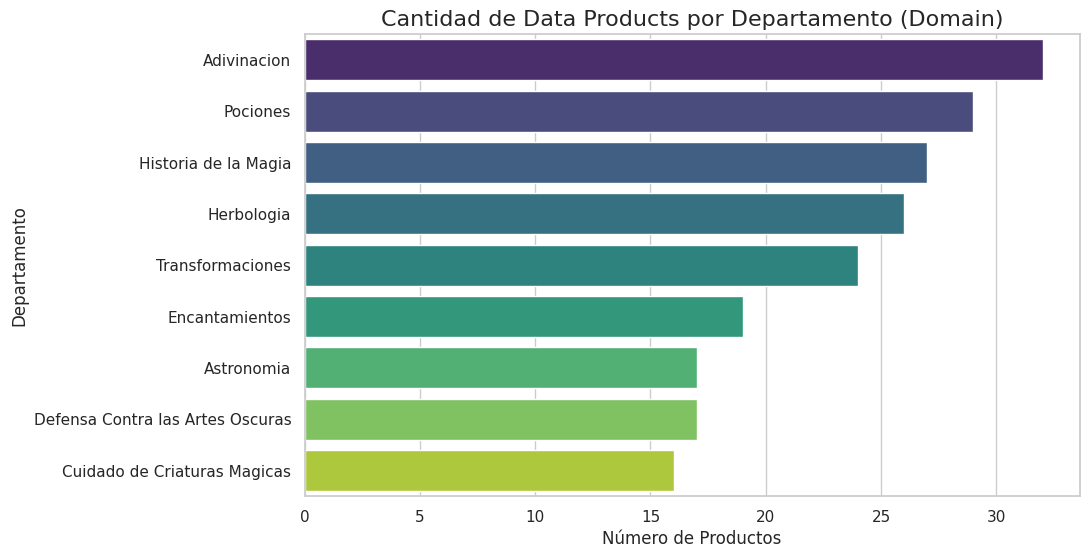

In [5]:
# Contamos cuántos Data Products únicos hay por Dominio
# Usamos el ID para asegurar que contamos productos, no registros duplicados si los hubiera
products_by_domain = hogwarts_df.groupby('Domain')['ID'].count().sort_values(ascending=False)

print("📜 Inventario de Productos Mágicos por Departamento:")
display(products_by_domain.to_frame(name='Cantidad de Productos'))

# GRÁFICO 1: Barras por Departamento
plt.figure(figsize=(10, 6))
sns.barplot(x=products_by_domain.values, y=products_by_domain.index, palette="viridis")
plt.title('Cantidad de Data Products por Departamento (Domain)', fontsize=16)
plt.xlabel('Número de Productos')
plt.ylabel('Departamento')
plt.show()

## 5. Auditoría de Cumplimiento Mágico (Compliance)

El Ministerio es muy estricto. Necesitamos saber qué porcentaje de nuestras herramientas cumplen con la normativa (`IsCompliance = True`). Si el cumplimiento baja, podríamos tener una visita de los Dementores (o auditores).

Analizaremos esto trimestre a trimestre.

📜 Reporte de Cumplimiento Trimestral:


,Trimestre,Cumple Normativa,Cantidad
0,1T,False,26
1,1T,True,24
2,2T,False,35
3,2T,True,35
4,3T,False,44
5,3T,True,43


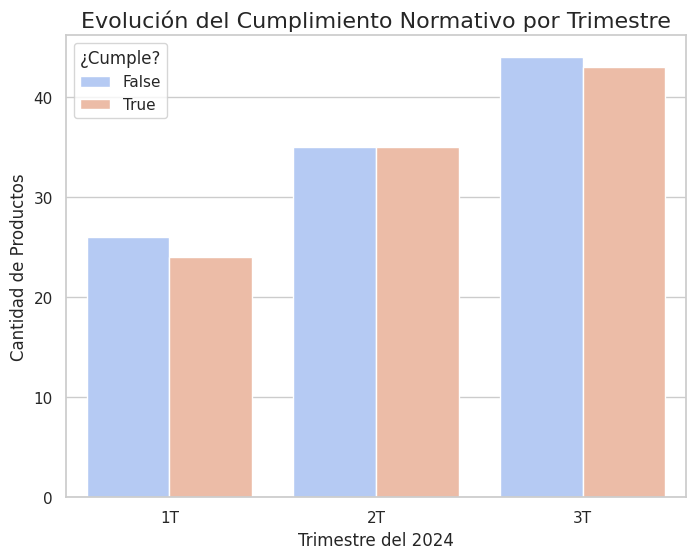

In [6]:
# Agrupamos por Trimestre y Estado de Cumplimiento
compliance_summary = hogwarts_df.groupby(['Quarter', 'IsCompliance'])['ID'].count().reset_index()

# Renombramos columnas para que la tabla se entienda mejor
compliance_summary.columns = ['Trimestre', 'Cumple Normativa', 'Cantidad']

print("📜 Reporte de Cumplimiento Trimestral:")
display(compliance_summary)

# GRÁFICO 2: Comparativa de Cumplimiento
plt.figure(figsize=(8, 6))
sns.barplot(data=compliance_summary, x='Trimestre', y='Cantidad', hue='Cumple Normativa', palette="coolwarm")
plt.title('Evolución del Cumplimiento Normativo por Trimestre', fontsize=16)
plt.xlabel('Trimestre del 2024')
plt.ylabel('Cantidad de Productos')
plt.legend(title='¿Cumple?')
plt.show()

## 6. Ciclo de Vida de los Productos (Status)

Finalmente, observaremos en qué estado se encuentran nuestros productos.
* **Production:** Funcionando en el castillo.
* **Development:** En el caldero (siendo creados).
* **Deprecated:** Hechizos antiguos que ya no usamos.

Esto nos dice si estamos innovando (muchos en 'Development') o manteniendo lo viejo.

📜 Matriz de Evolución de Estados:


Status,Deprecated,Development,Planned,Production
Quarter,,,,
1T,12,12,11,15
2T,17,14,16,23
3T,21,18,24,24


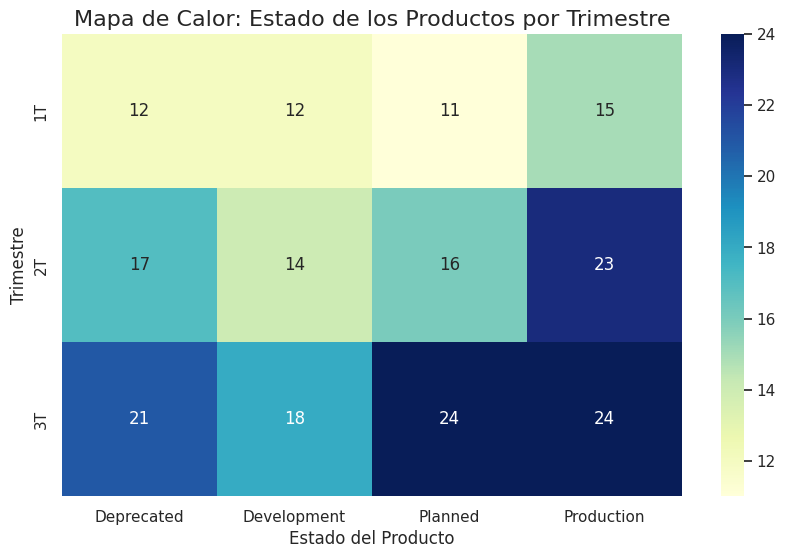

In [7]:
# Tabla cruzada (Crosstab) para ver la relación entre Trimestre y Status
status_evolution = pd.crosstab(hogwarts_df['Quarter'], hogwarts_df['Status'])

print("📜 Matriz de Evolución de Estados:")
display(status_evolution)

# GRÁFICO 3: Mapa de Calor (Heatmap)
# Un mapa de calor es ideal para detectar "puntos calientes" rápidamente
plt.figure(figsize=(10, 6))
sns.heatmap(status_evolution, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Mapa de Calor: Estado de los Productos por Trimestre', fontsize=16)
plt.ylabel('Trimestre')
plt.xlabel('Estado del Producto')
plt.show()